In [110]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
num_vals = 500

In [60]:
xs = np.linspace(0.0, 10.0, num=num_vals)
ys = np.linspace(0.0, 10.0, num=num_vals)

In [98]:
true_vals = np.zeros((num_vals, num_vals))

In [99]:
for idx, x in enumerate(xs):
    for idy, y in enumerate(ys):
        s = - (y - 4)*(y - 4) - (x - 2) *(x - 2) - 50
        true_vals[idy][idx] = s

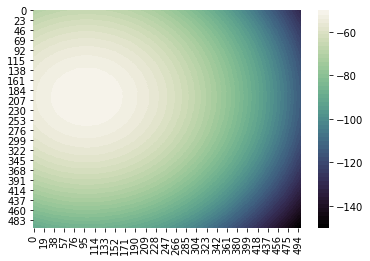

In [100]:
sns.heatmap(true_vals, cmap=sns.cubehelix_palette(55, start=.5, rot=-.75, dark=0, light=.95, reverse=True))

In [101]:
def get_noise():
    return np.random.normal(scale=10)

In [143]:
def measure(x, y):
    return true_vals[y][x] + get_noise()

In [144]:
def get_random_starting_position():
    return (np.random.randint(num_vals), np.random.randint(num_vals))

In [145]:
max_measure= [measure(100, 200) for i in range(100)]

Text(0.5,1,'100 measurements at the True Max, with value -50')

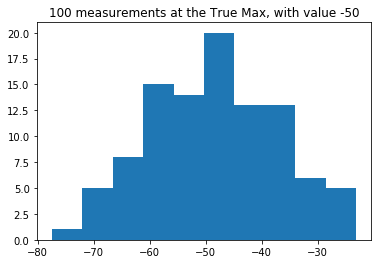

In [146]:
plt.hist(max_measure)
plt.title('100 measurements at the True Max, with value -50')

In [162]:
def get_next_move(x, y, measurements):
    step_size = 50
    if (x >= 450):
        return (50, y)
    else:
        return (x + step_size, y)

In [163]:
# Algorithm: pick random starting, get next move
measurements = {}
total_measurements = 10
(x, y) = get_random_starting_position()
measurements[(x, y)] = measure(x, y)
while(len(measurements.keys()) < total_measurements):
    (x, y) = get_next_move(x, y, measurements)
    measurements[(x, y)] = measure(x, y)

In [161]:
get_next_move(x, y, measurements)

50

In [168]:
ordered_keys = sorted(measurements.keys())

In [179]:
x_vals = [o[0] for o in ordered_keys]

In [171]:
ordered_measurements = [measurements[v] for v in ordered_keys]

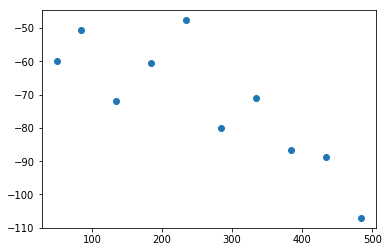

In [180]:
plt.scatter(x_vals, ordered_measurements)

In [166]:
for k in measurements:
    print(k)
    print(measurements[k])

(134, 83)
-71.8811223952
(184, 83)
-60.5064229537
(484, 83)
-107.051127341
(334, 83)
-71.0400921574
(384, 83)
-86.5298853058
(234, 83)
-47.6406514226
(434, 83)
-88.654297755
(84, 83)
-50.49154094
(50, 83)
-59.771121281
(284, 83)
-79.9214885646


In [222]:
z3 = np.polyfit(x_vals, ordered_measurements, 3)
p3 = np.poly1d(z3)
z2, res, _, singular, rcond = np.polyfit(x_vals, ordered_measurements, 2, full=True)
p2 = np.poly1d(z2)
z1, res, _, singular, rcond = np.polyfit(x_vals, ordered_measurements, 1, full=True)
p1 = np.poly1d(z1)

In [223]:
mu = np.mean(ordered_measurements)

In [224]:
TSS =  np.sum([(o - mu)**2 for o in ordered_measurements])

In [225]:
R = (TSS - res )  / TSS

In [226]:
R

array([ 0.67938881])

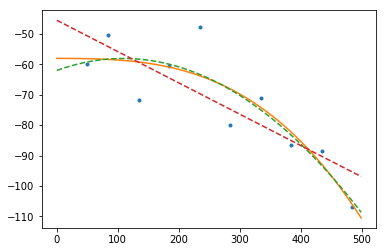

In [199]:
_ = plt.plot(x_vals, ordered_measurements, '.', xp, p3(xp), '-', xp, p2(xp), '--', xp, p1(xp), '--')

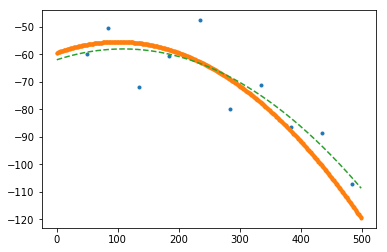

In [200]:
 _ = plt.plot(x_vals, ordered_measurements, '.', xp,  true_vals[83], '.', xp, p2(xp), '--')

In [201]:
z2

array([ -3.32458543e-04,   7.23662083e-02,  -6.20041175e+01])